In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('Data_auto.csv')

In [3]:
data.head()

,Unnamed: 0,Ranking,Label2,Placement
0,0,1,1.000000,31385.870723
1,1,2,2.462289,31406.375629
2,2,3,4.171168,31367.899279
3,3,4,6.062866,31425.849651
4,4,5,8.103283,31412.979236


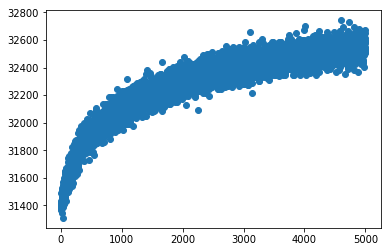

In [5]:
plt.scatter(data['Ranking'], data['Placement'])

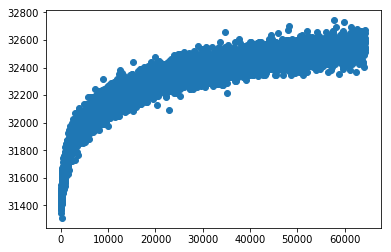

In [8]:
plt.scatter(data['Label2'], data['Placement'])

In [9]:
data['Ranking'] += 2000

In [10]:
data.head()

,Unnamed: 0,Ranking,Label2,Placement
0,0,2001,1.000000,31385.870723
1,1,2002,2.462289,31406.375629
2,2,2003,4.171168,31367.899279
3,3,2004,6.062866,31425.849651
4,4,2005,8.103283,31412.979236


In [11]:
data.describe()

,Unnamed: 0,Ranking,Label2,Placement
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,4500.500000,27991.943318,32285.429856
std,1443.520003,1443.520003,19177.880475,254.096598
min,0.000000,2001.000000,1.000000,31309.640391
25%,1249.750000,3250.750000,10624.822299,32152.341294
50%,2499.500000,4500.500000,26147.785880,32354.717312
75%,3749.250000,5750.250000,44287.206457,32473.347669
max,4999.000000,7000.000000,64366.664677,32743.172164


In [12]:
data.head()

,Unnamed: 0,Ranking,Label2,Placement
0,0,2001,1.000000,31385.870723
1,1,2002,2.462289,31406.375629
2,2,2003,4.171168,31367.899279
3,3,2004,6.062866,31425.849651
4,4,2005,8.103283,31412.979236


In [14]:
data['Ranking'] = (data['Ranking'] - 4500.5)/1433.52

In [15]:
data.head()

,Unnamed: 0,Ranking,Label2,Placement
0,0,-1.743610,1.000000,31385.870723
1,1,-1.742913,2.462289,31406.375629
2,2,-1.742215,4.171168,31367.899279
3,3,-1.741517,6.062866,31425.849651
4,4,-1.740820,8.103283,31412.979236


In [16]:
data['Placement'] = (data['Placement'] - 129063)/33841

In [17]:
data['Label2'] = (data['Label2'] - 27991)/19177

In [18]:
data.head()

,Unnamed: 0,Ranking,Label2,Placement
0,0,-1.743610,-1.459561,-2.886355
1,1,-1.742913,-1.459485,-2.885749
2,2,-1.742215,-1.459396,-2.886886
3,3,-1.741517,-1.459297,-2.885173
4,4,-1.740820,-1.459191,-2.885554


In [19]:
flag = ['Ranking', 'Label2']
label = ['Placement']

In [20]:
import tensorflow as tf

x_ = tf.placeholder(tf.float32, [None, 2])
y_ = tf.placeholder(tf.float32, [None, 1])

w1 = tf.Variable(tf.truncated_normal([2, 30], -1, 1))
b1 = tf.Variable(tf.constant(0.5, shape=[30]))
l1 = tf.sigmoid(tf.matmul(x_, w1) + b1)

w4 = tf.Variable(tf.truncated_normal([30, 1], -1, 1))
b4 = tf.Variable(tf.constant(0.05, shape=[1]))
y = tf.matmul(l1, w4) + b4

cost = tf.losses.mean_squared_error(y_, y)

train = tf.train.AdamOptimizer(0.01).minimize(cost)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(10000):
        sess.run(train, feed_dict = {x_: data[flag], y_: data[label]})
        if(i%1000==0):
            print(sess.run(cost, feed_dict = {x_: data[flag], y_: data[label]}))
    pred = sess.run(y, feed_dict = {x_: data[flag]})

349.381
0.000504542
0.000160272
0.000110794
6.95386e-05
4.14032e-05
2.43964e-05
1.45123e-05
8.9734e-06
5.99677e-06


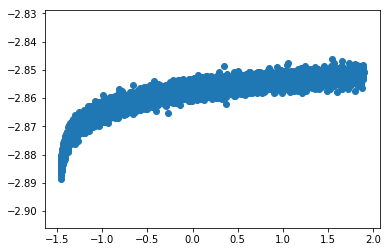

In [21]:
plt.scatter(data['Label2'], data['Placement'])

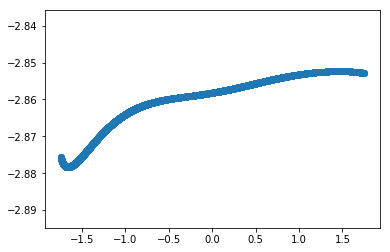

In [23]:
plt.scatter(data['Ranking'], pred)

In [26]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(10000):
        sess.run(train, feed_dict = {x_: data[flag], y_: data[label]})
        if(i%1000==0):
            print(sess.run(cost, feed_dict = {x_: data[flag], y_: data[label]}))
    pred = sess.run(y, feed_dict = {x_: data[flag]})

330.429
0.000347161
0.000127355
6.24406e-05
3.47763e-05
2.21224e-05
1.51782e-05
1.07016e-05
7.72353e-06
5.96601e-06


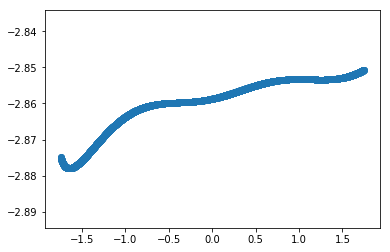

In [27]:
plt.scatter(data['Ranking'], pred)